# Assignment 8

1. Implement logistic regression using Python /R to perform classification on a given 
dataset. 
2. Compute Confusion Matrix of findTP,FP,TN,FN,Accuracy, Error Rate, Precision,Recall on 
the given dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.shape

(400, 5)

Text(0, 0.5, 'Frequency')

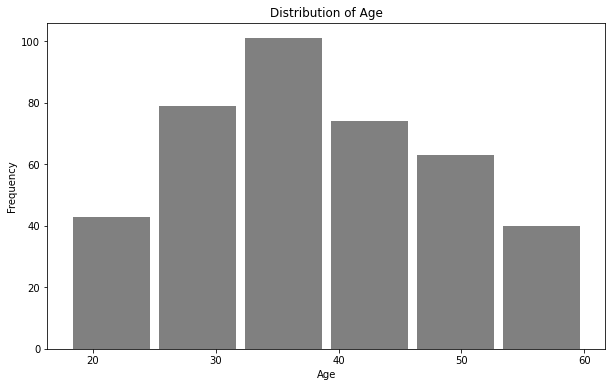

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'],bins=6,color='grey',rwidth=0.90)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [11]:
X=df.iloc[:,[2,3]].values
Y=df.iloc[:,4].values

In [12]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [13]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression()
log_mod.fit(x_train,y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('-----------------------------------------------------------------')
print('Model Performance for Training Set')
y_train_predict = log_mod.predict(x_train)
cm1 = confusion_matrix(y_train,y_train_predict)
print('Confusion Matrix :')
print(cm1)
tp = cm1[0][0]
tn = cm1[1][1]
fp = cm1[1][0]
fn = cm1[0][1]
ac1 = accuracy_score(y_train,y_train_predict)
print('accuracy is {}'.format(ac1))
error_rate1 = (fp+fn)/(fp+fn+tn+tp)
print('Error rate is {}'.format(error_rate1))
print('               Classification Report  ')
print(' ')
print(classification_report(y_train,y_train_predict))
print('-----------------------------------------------------------------')
print('Model Performance for Testing Set')
y_test_predict = log_mod.predict(x_test)
cm1 = confusion_matrix(y_test,y_test_predict)
print('Confusion Matrix :')
print(cm1)
tp = cm1[0][0]
tn = cm1[1][1]
fp = cm1[1][0]
fn = cm1[0][1]
ac1 = accuracy_score(y_test,y_test_predict)
print('accuracy is {}'.format(ac1))
error_rate1 = (fp+fn)/(fp+fn+tn+tp)
print('Error rate is {}'.format(error_rate1))
print('               Classification Report  ')
print(' ')
print(classification_report(y_test,y_test_predict))

-----------------------------------------------------------------
Model Performance for Training Set
Confusion Matrix :
[[165  14]
 [ 30  71]]
accuracy is 0.8428571428571429
Error rate is 0.15714285714285714
               Classification Report  
 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       179
           1       0.84      0.70      0.76       101

    accuracy                           0.84       280
   macro avg       0.84      0.81      0.82       280
weighted avg       0.84      0.84      0.84       280

-----------------------------------------------------------------
Model Performance for Testing Set
Confusion Matrix :
[[71  7]
 [10 32]]
accuracy is 0.8583333333333333
Error rate is 0.14166666666666666
               Classification Report  
 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        78
           1       0.82      0.76      0.79        42

    accuracy    

Sure! Here's an explanation of each term:

1. Linear Regression:
   - Linear regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more input features.
   - It assumes a linear relationship between the input features and the target variable and finds the best-fit line that minimizes the sum of squared errors.
   - The algorithm calculates coefficients and an intercept to estimate the target variable.
   - Linear regression is commonly used for tasks such as predicting house prices, stock prices, or sales revenue.

2. Logistic Regression:
   - Logistic regression is another supervised machine learning algorithm, but it is used for binary classification tasks, where the target variable has two classes (e.g., 0/1, True/False).
   - It models the probability of an event occurring by applying the logistic function to a linear combination of the input features.
   - Logistic regression estimates coefficients for the input features and uses them to make predictions about the probability of belonging to a particular class.
   - It is commonly used for tasks like predicting whether an email is spam or not, or whether a patient has a disease or not.

3. Confusion Matrix:
   - A confusion matrix is a table that summarizes the performance of a classification model.
   - It provides a detailed breakdown of the model's predictions and the actual outcomes, organized into different categories or classes.
   - A typical confusion matrix includes metrics such as true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
   - It helps in assessing the model's accuracy and identifying potential sources of error.

4. Error Rate:
   - Error rate, also known as misclassification rate, is the proportion of incorrectly classified instances over the total number of instances.
   - It measures the overall accuracy of a classification model by considering the combined errors made in predicting both positive and negative instances.
   - Error rate can be calculated as (FP + FN) / (TP + TN + FP + FN).

5. Accuracy Rate:
   - Accuracy rate is the proportion of correctly classified instances over the total number of instances.
   - It measures the overall correctness of a classification model by considering both true positive and true negative instances.
   - Accuracy rate can be calculated as (TP + TN) / (TP + TN + FP + FN).

6. Classification Report:
   - A classification report is a summary of various evaluation metrics for a classification model, including precision, recall, F1-score, and support.
   - Precision measures the proportion of true positive predictions out of all positive predictions, indicating the model's ability to avoid false positives.
   - Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances, indicating the model's ability to avoid false negatives.
   - F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance.
   - Support represents the number of instances in each class used for calculating the metrics.
   - A classification report is helpful in assessing the model's performance on each class and understanding the trade-offs between precision and recall.

These terms are commonly used in machine learning and provide insights into different aspects of model performance, evaluation, and the types of problems they are suitable for.